In [1]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [0]:
import os
os.chdir('/drive/My Drive/deep learning/Hackathon_main/Doctor Fee')


In [0]:
import numpy as np
import pandas as pd

In [0]:
train_data=pd.read_excel('Data_Train.xlsx')
test_data =pd.read_excel('Data_Test.xlsx')

In [5]:
train_data.shape,test_data.shape

((7628, 2), (2748, 1))

In [6]:
train_data.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [7]:
test_data.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
STORY      7628 non-null object
SECTION    7628 non-null int64
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
STORY    2748 non-null object
dtypes: object(1)
memory usage: 21.6+ KB


In [10]:
train_data.isnull().sum()

STORY      0
SECTION    0
dtype: int64

In [11]:
test_data.isnull().sum()

STORY    0
dtype: int64

In [12]:
train_data.describe()

,SECTION
count,7628.000000
mean,1.357892
std,0.999341
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [13]:
test_data.describe()

,STORY
count,2748
unique,2737
top,This story has been published from a wire agen...
freq,6


In [14]:
train_data['SECTION'].unique()

array([3, 0, 1, 2])

In [15]:
train_data['SECTION'].value_counts()

1    2772
2    1924
0    1686
3    1246
Name: SECTION, dtype: int64

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

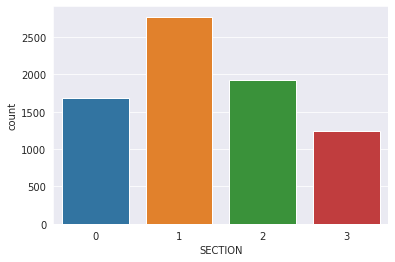

In [67]:
sns.countplot(train_data['SECTION'])

In [0]:
import re
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk import chunk

In [25]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
lem = WordNetLemmatizer()
stop = stopwords.words('english')

In [0]:
train_new_data = []
for data in train_data['STORY']:
    data = data.lower()
    data = re.sub(r'[^a-z0-9]',' ',data)
    data = re.sub(r'\s+',' ',data)
    data = [lem.lemmatize(word) for word in data.split() if word not in stop]
    data = ' '.join(data)
    train_new_data.append(data)
    

In [0]:
test_new_data = []
for data in test_data['STORY']:
    data = data.lower()
    data = re.sub(r'[^a-z0-9]',' ',data)
    data = re.sub(r'\s+',' ',data)
    data = [lem.lemmatize(word) for word in data.split() if word not in stop]
    data = ' '.join(data)
    test_new_data.append(data)

In [0]:
from sklearn .naive_bayes import MultinomialNB
from sklearn .feature_extraction.text import TfidfVectorizer,CountVectorizer

In [0]:
tfidf_train = TfidfVectorizer()
cv_train = CountVectorizer()

In [0]:
tfidf_test = TfidfVectorizer()
cv_test = CountVectorizer()

In [0]:
X_tf_train= tfidf_train.fit_transform(train_new_data).toarray()
X_cv_train = cv_train.fit_transform(train_new_data). toarray()


In [0]:
X_tf_test= tfidf_train.transform(test_new_data).toarray()
X_cv_test = cv_train.transform(test_new_data).toarray()


In [34]:
X_tf_train.shape,X_cv_train.shape

((7628, 29585), (7628, 29585))

In [35]:
X_tf_test.shape,X_cv_test.shape

((2748, 29585), (2748, 29585))

In [36]:
X_tf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
X_tf_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.22520658, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [38]:
tfidf_train.get_feature_names()

['00',
 '000',
 '000cd',
 '000km',
 '000mah',
 '000mw',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '009',
 '01',
 '010',
 '0104',
 '0124',
 '014',
 '015',
 '0163',
 '017',
 '018',
 '01mm',
 '02',
 '020mah',
 '022',
 '0230',
 '0231',
 '024',
 '0249',
 '025',
 '026',
 '027',
 '03',
 '030',
 '0301',
 '030mah',
 '031',
 '032',
 '0329',
 '033',
 '034',
 '03539',
 '038',
 '039',
 '03am',
 '04',
 '040',
 '042',
 '0437',
 '0441',
 '045',
 '0450',
 '045mah',
 '047',
 '049',
 '05',
 '052',
 '0526hrs',
 '053',
 '055',
 '056',
 '057',
 '058',
 '059',
 '05am',
 '06',
 '060',
 '060mah',
 '064',
 '0643',
 '065',
 '065mah',
 '066',
 '067',
 '068',
 '07',
 '070',
 '0705',
 '071',
 '0713',
 '0727',
 '074',
 '0745',
 '0747',
 '075',
 '076',
 '08',
 '080',
 '0802',
 '080p',
 '081',
 '086',
 '0860',
 '087',
 '088',
 '089',
 '09',
 '090mah',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '098',
 '099',
 '0gear',
 '10',
 '100',
 '1000',
 '10000pioneer',
 '1000xm3',
 '100g',
 '100gb',
 '100hz'

In [39]:
cv_train.get_feature_names()

['00',
 '000',
 '000cd',
 '000km',
 '000mah',
 '000mw',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '009',
 '01',
 '010',
 '0104',
 '0124',
 '014',
 '015',
 '0163',
 '017',
 '018',
 '01mm',
 '02',
 '020mah',
 '022',
 '0230',
 '0231',
 '024',
 '0249',
 '025',
 '026',
 '027',
 '03',
 '030',
 '0301',
 '030mah',
 '031',
 '032',
 '0329',
 '033',
 '034',
 '03539',
 '038',
 '039',
 '03am',
 '04',
 '040',
 '042',
 '0437',
 '0441',
 '045',
 '0450',
 '045mah',
 '047',
 '049',
 '05',
 '052',
 '0526hrs',
 '053',
 '055',
 '056',
 '057',
 '058',
 '059',
 '05am',
 '06',
 '060',
 '060mah',
 '064',
 '0643',
 '065',
 '065mah',
 '066',
 '067',
 '068',
 '07',
 '070',
 '0705',
 '071',
 '0713',
 '0727',
 '074',
 '0745',
 '0747',
 '075',
 '076',
 '08',
 '080',
 '0802',
 '080p',
 '081',
 '086',
 '0860',
 '087',
 '088',
 '089',
 '09',
 '090mah',
 '091',
 '092',
 '093',
 '094',
 '095',
 '096',
 '098',
 '099',
 '0gear',
 '10',
 '100',
 '1000',
 '10000pioneer',
 '1000xm3',
 '100g',
 '100gb',
 '100hz'

In [0]:
y = train_data['SECTION']


In [41]:
y.shape

(7628,)

In [42]:
X_tf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
X_tf_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.22520658, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


In [45]:
rn =  RandomForestClassifier(bootstrap=True)
model1 = rn.fit(X_tf_train,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
nb = MultinomialNB()
model2 = nb.fit(X_tf_train,y)

In [0]:
pred_nb_1 = model1.predict(X_tf_train)
pred_nb_2 = model2.predict(X_tf_train)


In [0]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [49]:
accuracy_score1_RF = accuracy_score(y,pred_nb_1)
accuracy_score1_RF

0.9963293130571579

In [50]:
accuracy_score2_NB = accuracy_score(y,pred_nb_2)
accuracy_score2_NB

0.9686680650235973

In [0]:
test = rn.predict(X_tf_test)

In [52]:
test

array([1, 2, 1, ..., 1, 0, 1])

In [0]:
test_pred = pd.DataFrame(test)

In [0]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import time

In [0]:
rf_clf = RandomForestClassifier()

parameter_grid = {'n_estimators' :[5,10,25,50,100],'criterion' : ['gini','entropy'],'max_features': [1,2,3,4]}

In [0]:
cross_validation = StratifiedKFold(n_splits = 10, shuffle= True , random_state= 101)

In [0]:
grid_search = GridSearchCV(rf_clf,param_grid= parameter_grid,cv = cross_validation)

In [60]:
start = time.time()
grid_search.fit(X_tf_train,y)
end = time.time()
print(end-start)

2379.002903699875


In [61]:
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best parameters: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 100}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
grid_search.best_score_

0.9514944939695857

In [0]:
final_test_pred = grid_search.predict(X_tf_test)